<a href="https://colab.research.google.com/github/ShardenduMishra22/Data-Science/blob/main/Stats_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Data - Summary

## 1. Qualitative vs Quantitative Data
- **Qualitative (Categorical):** Describes categories or labels, no numeric meaning.  
  *Examples:* Gender (Male/Female), Traffic light colors (Red/Green).  
- **Quantitative (Numerical):** Represents measurable quantities, arithmetic possible.  
  *Examples:* Age, Height, Income.  

## 2. Scales of Measurement
- **Nominal:** Labels only, no order.  
  *Example:* Passport country (India, USA, Japan).  
- **Ordinal:** Order matters, gaps not equal.  
  *Example:* Education level (High School < Undergraduate < Postgraduate).  
- **Interval:** Equal intervals, no true zero.  
  *Example:* Celsius temperature (10°C, 20°C).  
- **Ratio:** Equal intervals, true zero.  
  *Example:* Salary (₹0 means no income).  

## 3. Discrete vs Continuous Data
- **Discrete:** Countable values only.  
  *Example:* Goals scored in a football match.  
- **Continuous:** Infinite values within a range.  
  *Example:* Weight of a person (72.35 kg).

In [2]:
# Install seaborn if not already
!pip install seaborn

Stem-and-Leaf Plot:
Stem | Leaf
1 | 2 5 7
2 | 2 5 5
3 | 0 5
4 | 0 5
5 | 0 0 5
6 | 0 5




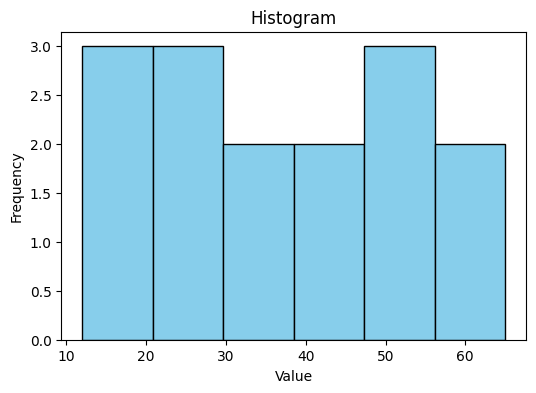

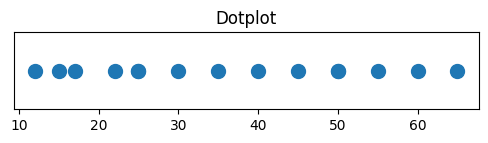

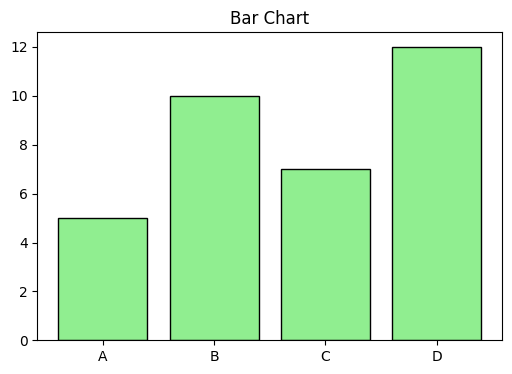

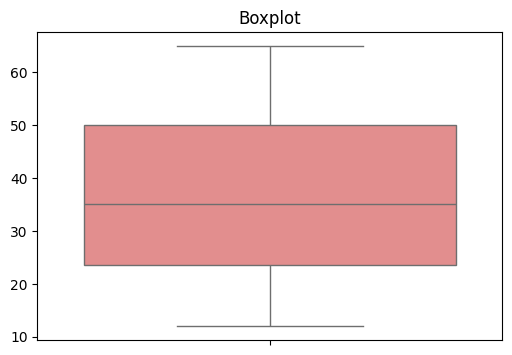

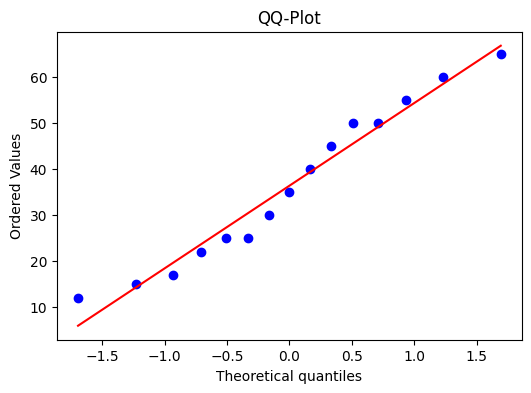

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# Sample dataset
data = [12, 15, 17, 22, 25, 25, 30, 35, 40, 45, 50, 50, 55, 60, 65]

# ---------- 1. Stem-and-Leaf Plot ----------
def stem_and_leaf(data):
    stems = {}
    for number in data:
        stem = number // 10
        leaf = number % 10
        stems.setdefault(stem, []).append(leaf)
    print("Stem | Leaf")
    for stem in sorted(stems):
        print(f"{stem} | {' '.join(map(str, sorted(stems[stem])))}")

print("Stem-and-Leaf Plot:")
stem_and_leaf(data)
print("\n")

# ---------- 2. Histogram ----------
plt.figure(figsize=(6,4))
plt.hist(data, bins=6, color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# ---------- 3. Dotplot ----------
plt.figure(figsize=(6,1))
plt.plot(data, np.zeros_like(data), 'o', markersize=10)
plt.title("Dotplot")
plt.yticks([])
plt.show()

# ---------- 4. Bar Chart ----------
# For categorical example
categories = ['A','B','C','D']
counts = [5, 10, 7, 12]
plt.figure(figsize=(6,4))
plt.bar(categories, counts, color='lightgreen', edgecolor='black')
plt.title("Bar Chart")
plt.show()

# ---------- 5. Boxplot ----------
plt.figure(figsize=(6,4))
sns.boxplot(data=data, color='lightcoral')
plt.title("Boxplot")
plt.show()

# ---------- 6. QQ-Plot ----------
plt.figure(figsize=(6,4))
stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.show()

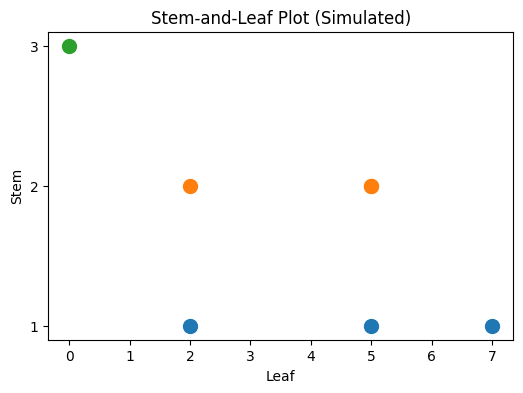

In [6]:
import matplotlib.pyplot as plt

data = [12, 15, 17, 22, 25, 25, 30]

# Compute stems and leaves
stems = [x // 10 for x in data]
leaves = [x % 10 for x in data]

# Create scatter plot
plt.figure(figsize=(6,4))
for stem in sorted(set(stems)):
    x = [leaf for s, leaf in zip(stems, leaves) if s == stem]
    y = [stem]*len(x)  # repeat stem for each corresponding leaf
    plt.scatter(x, y, s=100)

plt.yticks(sorted(set(stems)))
plt.xlabel("Leaf")
plt.ylabel("Stem")
plt.title("Stem-and-Leaf Plot (Simulated)")
plt.show()

In [7]:
from scipy.stats import entropy
import numpy as np

# Probability distribution
p = [0.5, 0.5]  # fair coin
H = entropy(p, base=2)
print("Entropy:", H, "bits")

Entropy: 1.0 bits
